# Конспект обработки

### Загрузка и очистка

**Основные действия**
- загрузка данных
- реформатирование типов данных
- работа с пропусками
- выявления и работа с некорректными данными и выбросами
- категоризация данных

In [88]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
from sklearn.model_selection import train_test_split

%matplotlib inline
warnings.filterwarnings('ignore')
np.random.seed(37)

In [147]:
# 1.1. Загрузка данных
tfull = pd.read_csv('training_project_data.csv')

In [148]:
tfull.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
0,150000.0,2,2,2,24,1,2,0,0,0,...,17853.0,34527.0,28277.0,0.0,2145.0,10000.0,22000.0,3000.0,5093.0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,30748.0,30162.0,30016.0,0.0,0.0,0.0,0.0,3100.0,798.0,1
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,6784.0,6923.0,14116.0,0.0,0.0,6784.0,159.0,167.0,760.0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,55182.0,48983.0,50136.0,3500.0,2000.0,20000.0,2000.0,2000.0,2000.0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,47026.0,45971.0,47573.0,0.0,6500.0,1800.0,0.0,2500.0,2000.0,0


Делаю искусственную операцию - для придания реализма задаче:

делим данные на 2 части: тренировочные и тестовые (у тестовых отделю целевой признак)

In [149]:
N = 5000
#train
train_full = tfull.iloc[:N,:].copy()
#test
test_full = tfull.iloc[N:,:-1].copy()
#key ans
test_full_ans = tfull.iloc[N:,-1].copy()

display(train_full.head(), train_full.shape)
display(test_full.head(), test_full.shape)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
0,150000.0,2,2,2,24,1,2,0,0,0,...,17853.0,34527.0,28277.0,0.0,2145.0,10000.0,22000.0,3000.0,5093.0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,30748.0,30162.0,30016.0,0.0,0.0,0.0,0.0,3100.0,798.0,1
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,6784.0,6923.0,14116.0,0.0,0.0,6784.0,159.0,167.0,760.0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,55182.0,48983.0,50136.0,3500.0,2000.0,20000.0,2000.0,2000.0,2000.0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,47026.0,45971.0,47573.0,0.0,6500.0,1800.0,0.0,2500.0,2000.0,0


(5000, 24)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
5000,20000.0,2,2,1,27,0,0,0,-1,0,...,18005.0,1822.0,1316.0,1316.0,1500.0,1200.0,2000.0,0.0,0.0,0.0
5001,390000.0,2,2,2,30,0,0,0,-1,-1,...,3350.0,4710.0,80474.0,80330.0,1070.0,1226.0,4710.0,83756.0,3100.0,3100.0
5002,70000.0,2,1,1,29,0,0,0,0,0,...,69582.0,69589.0,68728.0,69304.0,3300.0,3100.0,2800.0,2600.0,2940.0,3000.0
5003,40000.0,2,2,2,26,0,0,2,0,0,...,38582.0,39478.0,39620.0,38687.0,3967.0,0.0,1858.0,1500.0,5000.0,1605.0
5004,200000.0,1,2,1,43,2,3,2,2,2,...,94772.0,92368.0,101837.0,103764.0,0.0,5000.0,0.0,12000.0,3700.0,0.0


(5000, 23)

и сделаю пропусков - случайно

In [150]:
np.nan

nan

In [151]:
k = 20 # номер признака с пробелами

ind_k = np.random.randint(0,4999,(100,1))

train_full.iloc[ind_k,k] = np.nan

ind_k = np.random.randint(0,4999,(100,1))

test_full.iloc[ind_k,k] = np.nan


Закончили портить пример - начитаем работать

In [152]:
test_full.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
5000,20000.0,2,2,1,27,0,0,0,-1,0,...,18005.0,1822.0,1316.0,1316.0,1500.0,1200.0,2000.0,0.0,0.0,0.0
5001,390000.0,2,2,2,30,0,0,0,-1,-1,...,3350.0,4710.0,80474.0,80330.0,1070.0,1226.0,4710.0,83756.0,3100.0,3100.0
5002,70000.0,2,1,1,29,0,0,0,0,0,...,69582.0,69589.0,68728.0,69304.0,3300.0,3100.0,2800.0,2600.0,2940.0,3000.0
5003,40000.0,2,2,2,26,0,0,2,0,0,...,38582.0,39478.0,39620.0,38687.0,3967.0,0.0,1858.0,1500.0,5000.0,1605.0
5004,200000.0,1,2,1,43,2,3,2,2,2,...,94772.0,92368.0,101837.0,103764.0,0.0,5000.0,0.0,12000.0,3700.0,0.0


Посмотрим на данные целиком

In [153]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
LIMIT_BAL             5000 non-null float64
SEX                   5000 non-null int64
EDUCATION             5000 non-null int64
MARRIAGE              5000 non-null int64
AGE                   5000 non-null int64
PAY_1                 5000 non-null int64
PAY_2                 5000 non-null int64
PAY_3                 5000 non-null int64
PAY_4                 5000 non-null int64
PAY_5                 5000 non-null int64
PAY_6                 5000 non-null int64
BILL_AMT1             5000 non-null float64
BILL_AMT2             5000 non-null float64
BILL_AMT3             5000 non-null float64
BILL_AMT4             5000 non-null float64
BILL_AMT5             5000 non-null float64
BILL_AMT6             5000 non-null float64
PAY_AMT1              5000 non-null float64
PAY_AMT2              5000 non-null float64
PAY_AMT3              5000 non-null float64
PAY_AMT4              4900 non-nu

In [154]:
test_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 5000 to 9999
Data columns (total 23 columns):
LIMIT_BAL    5000 non-null float64
SEX          5000 non-null int64
EDUCATION    5000 non-null int64
MARRIAGE     5000 non-null int64
AGE          5000 non-null int64
PAY_1        5000 non-null int64
PAY_2        5000 non-null int64
PAY_3        5000 non-null int64
PAY_4        5000 non-null int64
PAY_5        5000 non-null int64
PAY_6        5000 non-null int64
BILL_AMT1    5000 non-null float64
BILL_AMT2    5000 non-null float64
BILL_AMT3    5000 non-null float64
BILL_AMT4    5000 non-null float64
BILL_AMT5    5000 non-null float64
BILL_AMT6    5000 non-null float64
PAY_AMT1     5000 non-null float64
PAY_AMT2     5000 non-null float64
PAY_AMT3     5000 non-null float64
PAY_AMT4     4901 non-null float64
PAY_AMT5     5000 non-null float64
PAY_AMT6     5000 non-null float64
dtypes: float64(13), int64(10)
memory usage: 898.6 KB


Превратим категориальные признаки в стринги

In [155]:
for colname in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    train_full[colname] = train_full[colname].astype(str)

Посмотрим на описание числовых признаков

In [156]:
train_full.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,4900.000000,5000.000000,5000.000000,5000.000000
mean,167534.000000,35.403400,52262.014600,50116.101600,48179.337800,44167.629800,40390.07000,38936.693200,5490.896600,5798.034600,5322.451400,4319.034694,4676.073200,5275.610400,0.218600
std,129540.321842,9.227724,76730.660158,74085.638282,71493.368772,67339.168174,62610.06272,60983.041889,13617.785314,18176.899227,19567.356151,12340.955876,13879.510761,18559.093661,0.413338
min,10000.000000,21.000000,-6027.000000,-24704.000000,-17706.000000,-65167.000000,-9584.00000,-209051.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3241.250000,2982.000000,2491.750000,2307.000000,1586.75000,1306.500000,966.250000,672.500000,390.000000,300.000000,285.750000,74.000000,0.000000
50%,140000.000000,34.000000,22599.000000,21525.000000,20485.500000,19282.500000,18121.00000,17007.500000,2199.000000,2000.000000,1829.500000,1500.000000,1516.000000,1500.000000,0.000000
75%,240000.000000,41.000000,68680.000000,64939.500000,60783.250000,54891.500000,49451.75000,48770.000000,5017.250000,5000.000000,4722.250000,4053.000000,4100.000000,4000.000000,0.000000
max,1000000.000000,75.000000,964511.000000,983931.000000,689643.000000,891586.000000,927171.00000,961664.000000,272817.000000,401003.000000,896040.000000,281225.000000,417990.000000,422000.000000,1.000000


Проверяем целевую переменную - она сильно разбалансированна

In [157]:
train_full['NEXT_MONTH_DEFAULT'].value_counts()

0    3907
1    1093
Name: NEXT_MONTH_DEFAULT, dtype: int64

In [158]:
# 1.2. Пропущенные данные и уникальные данные

def show_nans(df):
    for col in df.columns:
        print(col,5*'.',': number of unique:',len(df[col].unique()),':   number of nan records: ',df[col].isna().sum())
        print(30*'-')

In [159]:
# 1.2.2. Пропущенные данные и уникальные данные. Train dataset
show_nans(train_full)

LIMIT_BAL ..... : number of unique: 64 :   number of nan records:  0
------------------------------
SEX ..... : number of unique: 2 :   number of nan records:  0
------------------------------
EDUCATION ..... : number of unique: 7 :   number of nan records:  0
------------------------------
MARRIAGE ..... : number of unique: 4 :   number of nan records:  0
------------------------------
AGE ..... : number of unique: 52 :   number of nan records:  0
------------------------------
PAY_1 ..... : number of unique: 5 :   number of nan records:  0
------------------------------
PAY_2 ..... : number of unique: 5 :   number of nan records:  0
------------------------------
PAY_3 ..... : number of unique: 5 :   number of nan records:  0
------------------------------
PAY_4 ..... : number of unique: 4 :   number of nan records:  0
------------------------------
PAY_5 ..... : number of unique: 4 :   number of nan records:  0
------------------------------
PAY_6 ..... : number of unique: 4 :   num

In [160]:
# 1.2.3 Пропущенные данные и уникальные данные. Test dataset
show_nans(test_full)

LIMIT_BAL ..... : number of unique: 69 :   number of nan records:  0
------------------------------
SEX ..... : number of unique: 2 :   number of nan records:  0
------------------------------
EDUCATION ..... : number of unique: 6 :   number of nan records:  0
------------------------------
MARRIAGE ..... : number of unique: 4 :   number of nan records:  0
------------------------------
AGE ..... : number of unique: 49 :   number of nan records:  0
------------------------------
PAY_1 ..... : number of unique: 5 :   number of nan records:  0
------------------------------
PAY_2 ..... : number of unique: 5 :   number of nan records:  0
------------------------------
PAY_3 ..... : number of unique: 5 :   number of nan records:  0
------------------------------
PAY_4 ..... : number of unique: 4 :   number of nan records:  0
------------------------------
PAY_5 ..... : number of unique: 4 :   number of nan records:  0
------------------------------
PAY_6 ..... : number of unique: 4 :   num

**Предлагаемые действия по пропущенным данным**
- Найден признак с пропущенными данными - для тестов и тренировок
- сделаем регрессионное заполнение (потом)

Пока проверяем данные в тестах и тренировках

In [161]:
# 1.2.4. Визуальное изучение распределений - пользовательская функция
def plot_outliers(df_train, df_test, col_name, hist = False):
    fig, ax = plt.subplots(1,3,figsize=(16,5))
    #ax[0].set_title(f'KDE for both datasets on {col_name}')
    ax[1].set_title('Train Dataset')
    ax[2].set_title('Test Dataset')
    sns.distplot(df_train[col_name], color='b', ax=ax[0], hist=hist, label='Train')
    sns.distplot(df_test[col_name], color='r', ax=ax[0], hist=hist, label='Test')
    sns.boxplot(df_train[col_name], ax=ax[1])
    sns.boxplot(df_test[col_name], color='r', ax=ax[2])
    plt.show()

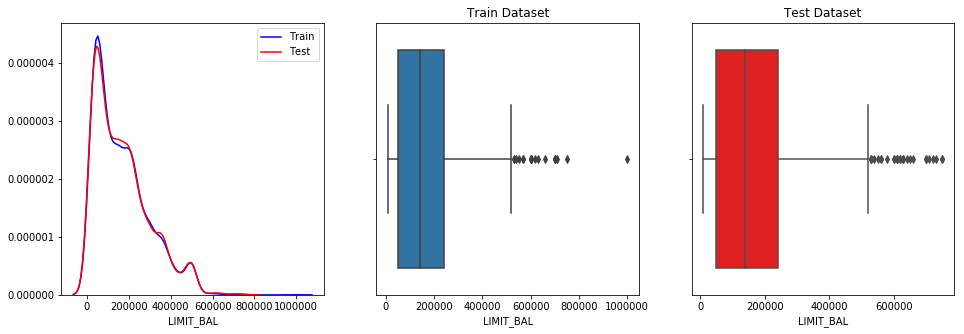

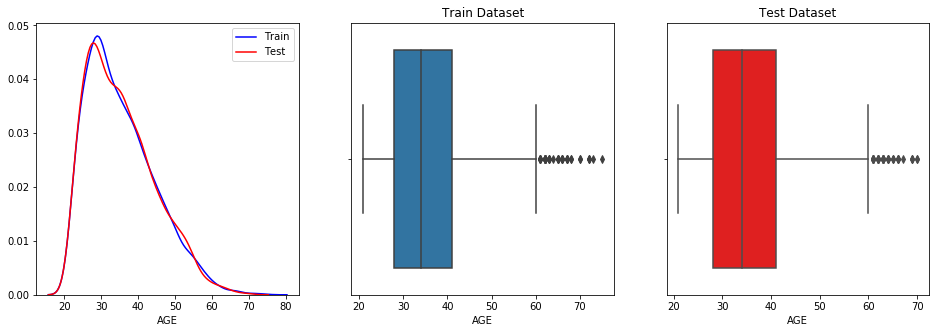

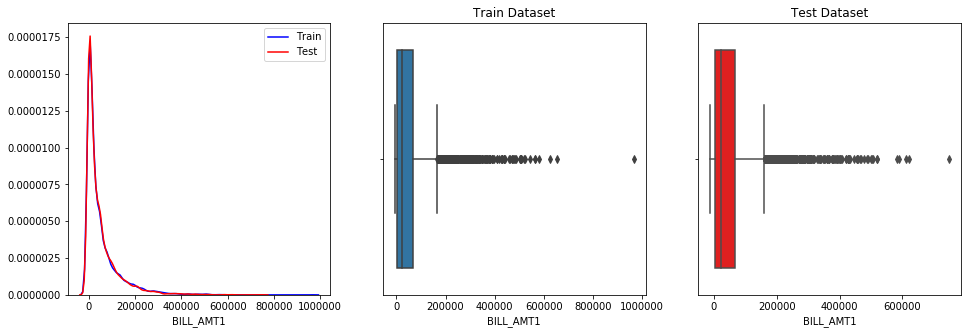

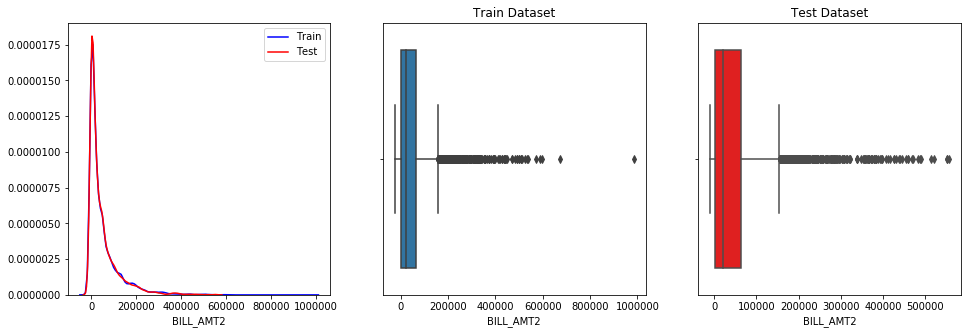

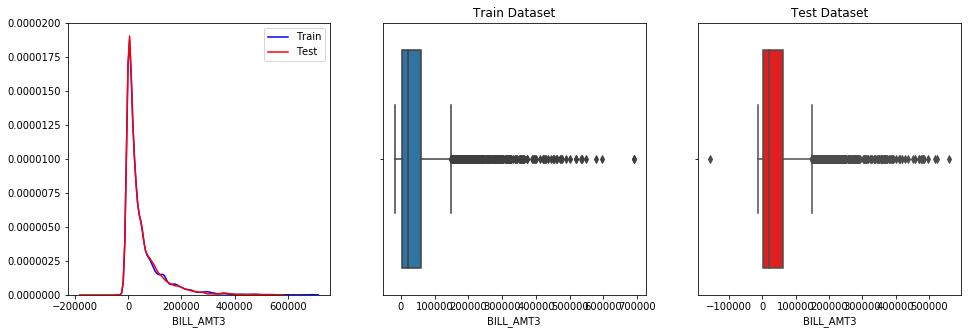

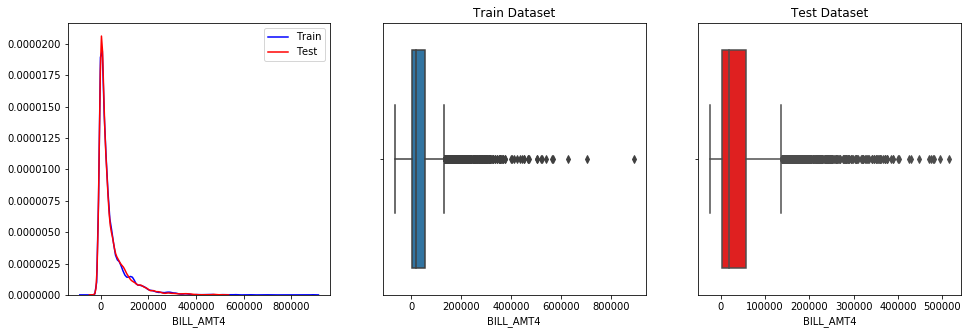

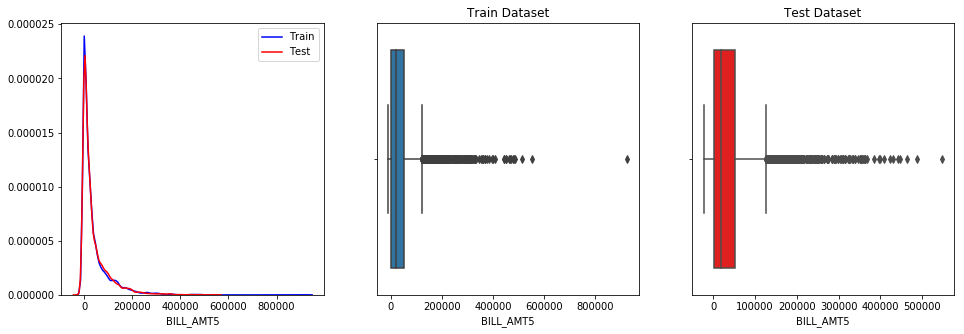

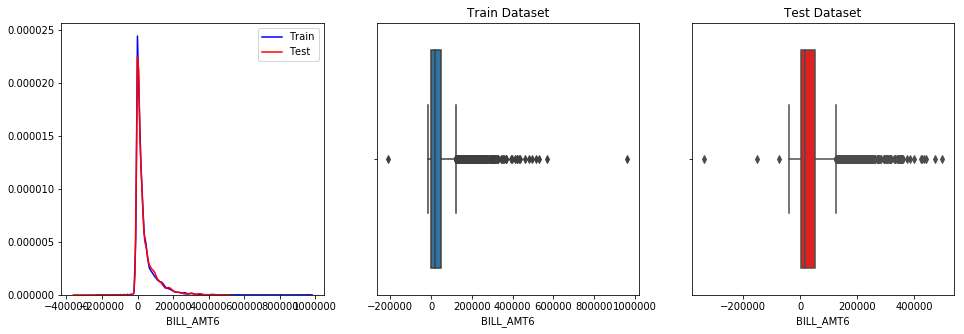

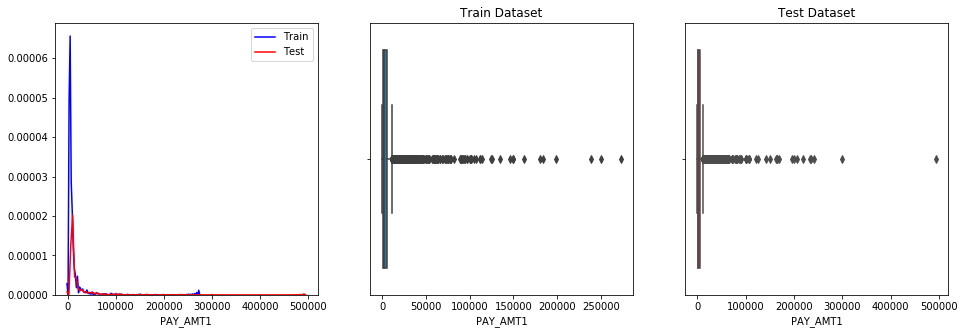

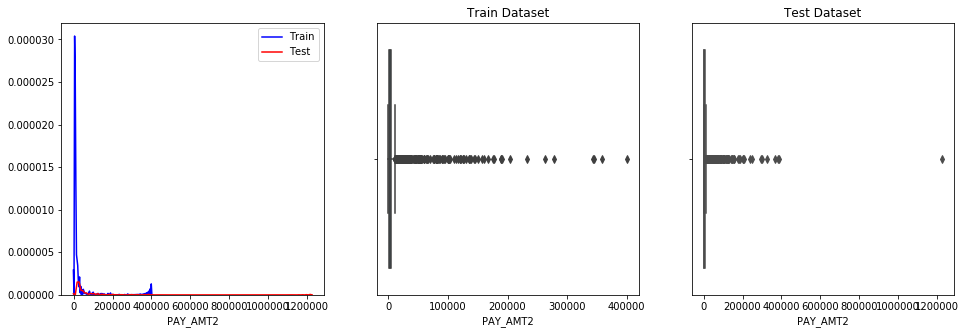

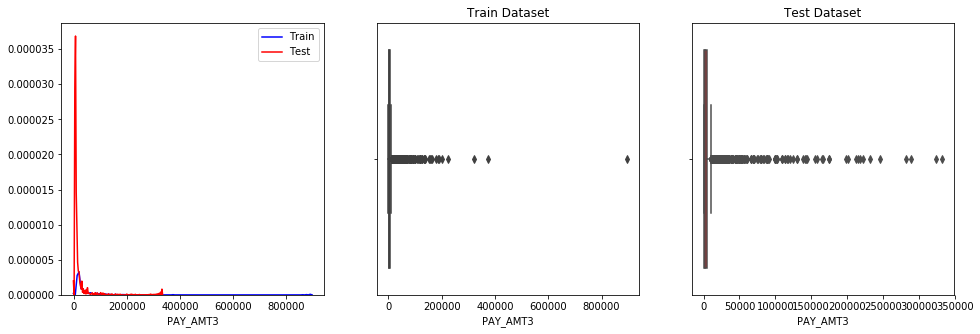

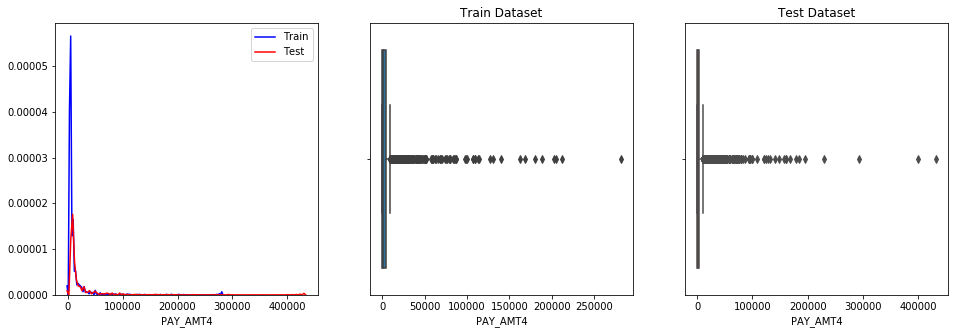

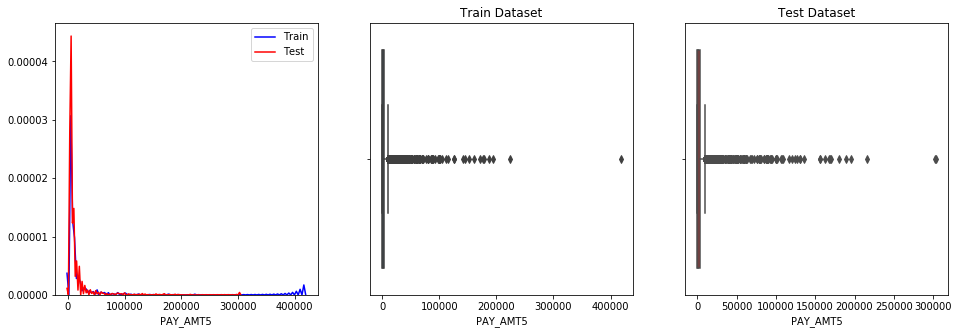

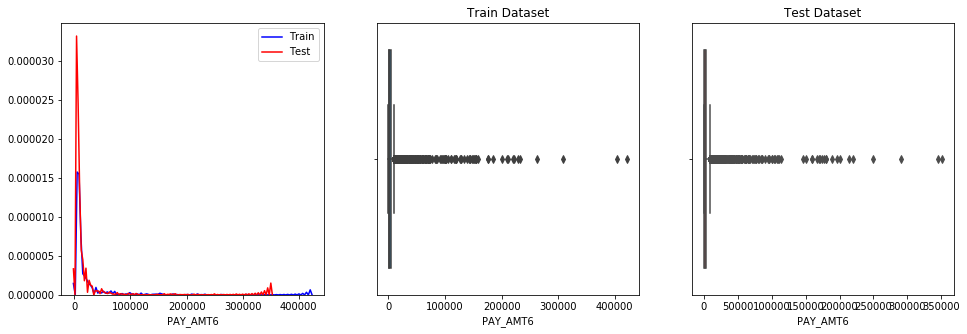

In [162]:
# 1.2.5. Визуальное изучение распределений - непрерывные данные

cont_cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

cat_cols =['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

TARGET = ['NEXT_MONTH_DEFAULT']


for col in cont_cols:
    plot_outliers(train_full, test_full,col)

Выводы из визуального анализа
- в целом гистограммы однородны и похожи у датасетов
  - поэтому замена пропущенных данных может производится у тестовых и тренировочных данных независимо
- выявленны выбросы (сверху), но не обязательно точно выбросы
- предлагается определить верхние границы выбросов таким образом, чтобы оставшийся диапазон тренировочного датасета покрывал данные тестового датасета (т.е. по большей (или меньшей))


In [163]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
LIMIT_BAL             5000 non-null float64
SEX                   5000 non-null object
EDUCATION             5000 non-null object
MARRIAGE              5000 non-null object
AGE                   5000 non-null int64
PAY_1                 5000 non-null object
PAY_2                 5000 non-null object
PAY_3                 5000 non-null object
PAY_4                 5000 non-null object
PAY_5                 5000 non-null object
PAY_6                 5000 non-null object
BILL_AMT1             5000 non-null float64
BILL_AMT2             5000 non-null float64
BILL_AMT3             5000 non-null float64
BILL_AMT4             5000 non-null float64
BILL_AMT5             5000 non-null float64
BILL_AMT6             5000 non-null float64
PAY_AMT1              5000 non-null float64
PAY_AMT2              5000 non-null float64
PAY_AMT3              5000 non-null float64
PAY_AMT4              49

## Согласованность категориальных данных
 исследуем категориальные данные на предмет полноты в обоих выборках

In [164]:
def plot_outliers_cat(df_train,df_test, col_name,  TARGET_NAME = TARGET):
    fig, ax = plt.subplots(1,2,figsize=(16,5))
   
    ax[0].set_title('Train Dataset')
    ax[1].set_title('Test Dataset')   

    sns.countplot(x=col_name, data=df_train, ax=ax[0]);
    sns.countplot(x=col_name, data=df_test, ax=ax[1]);
    plt.show()

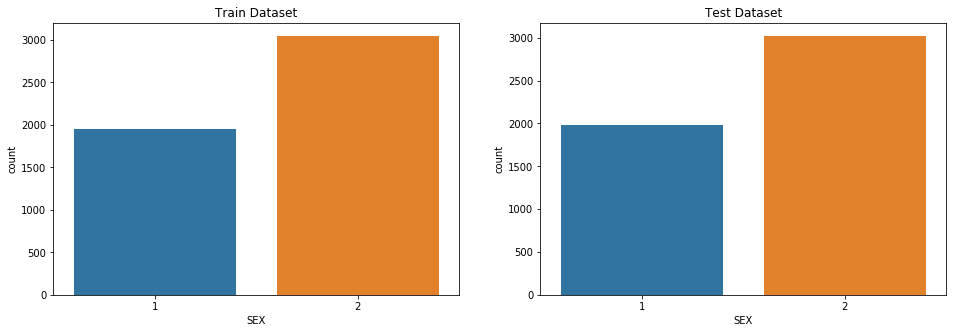

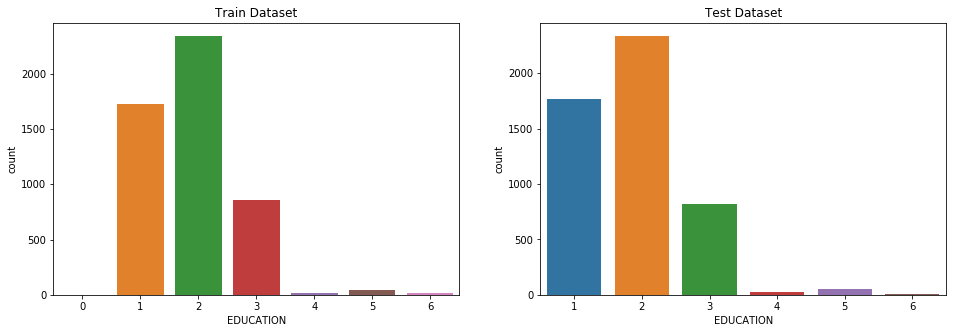

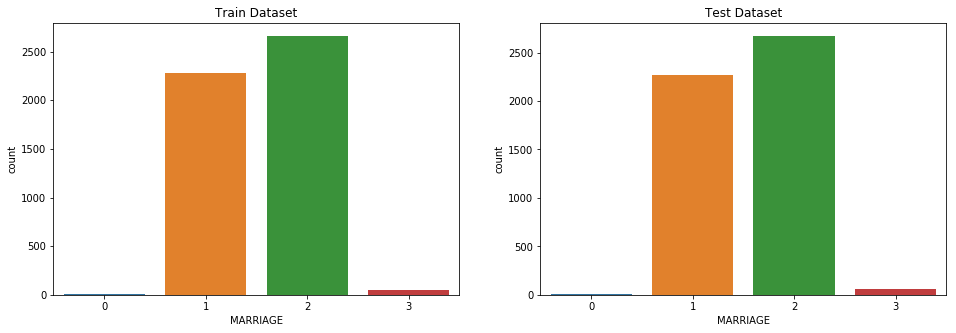

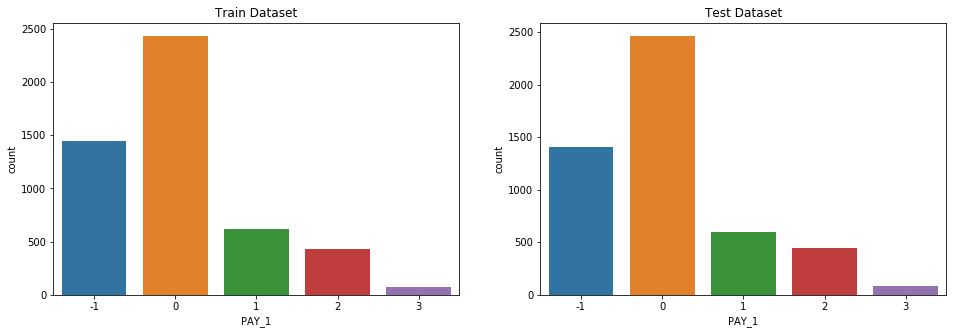

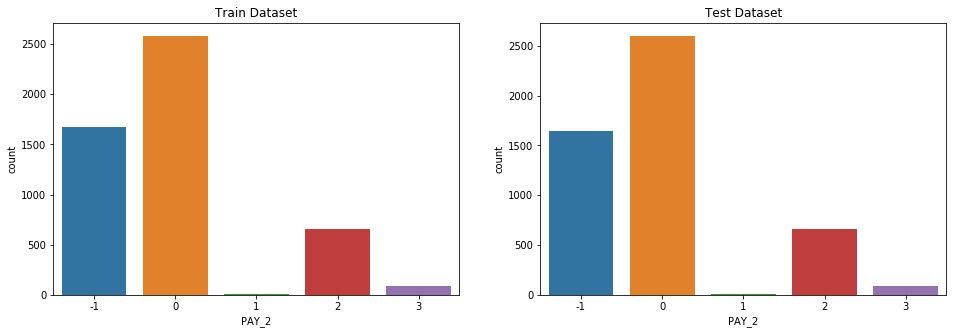

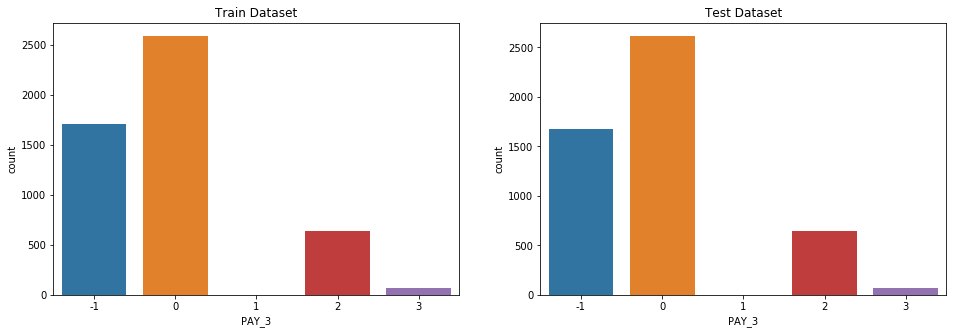

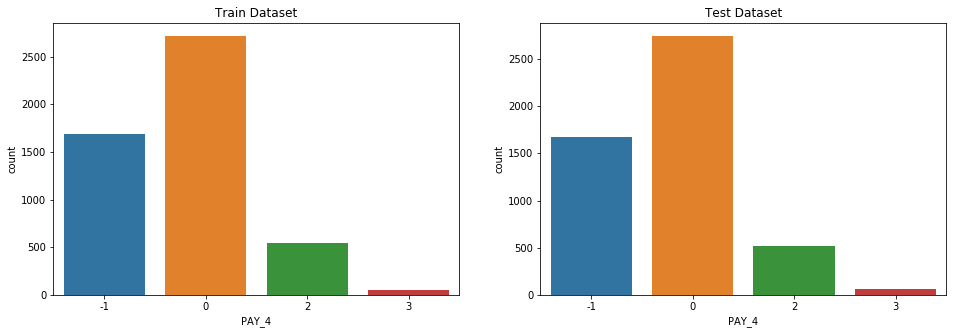

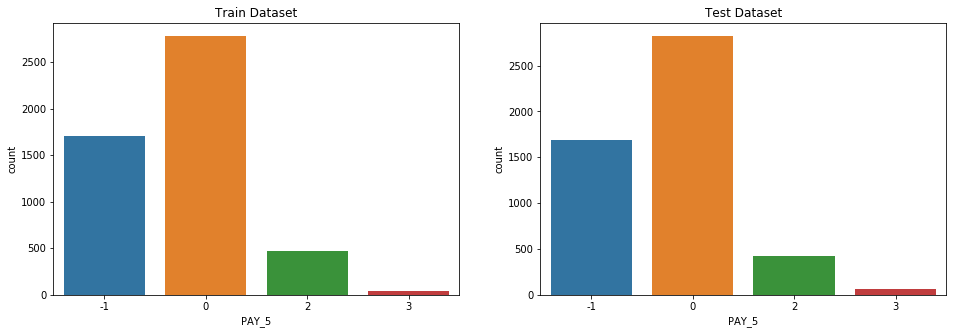

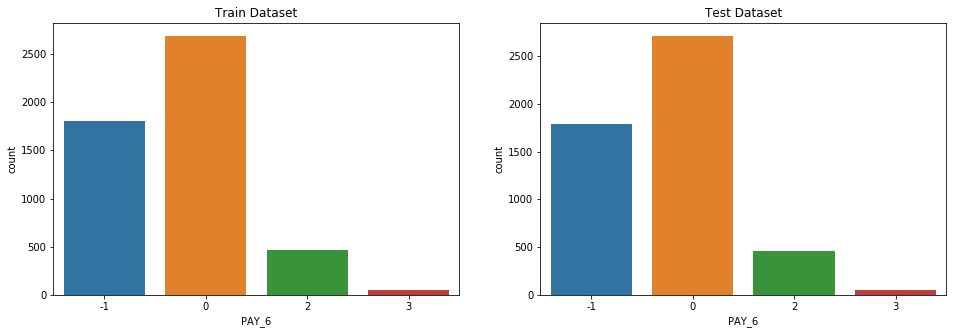

In [165]:
for col in cat_cols:
    plot_outliers_cat(train_full,test_full, col, TARGET_NAME = TARGET)

Выводы из визуального анализа
- в целом гистограммы однородны и похожи у датасетов
  - поэтому замена пропущенных данных может производится у тестовых и тренировочных данных независимо
- выявленны выбросы (сверху)
- при этом, значения выбросов тестовой выборки - больше чем у тренировочной
- есть различия в категориальных признаках
- есть 0 как ошибка (EDUCATION,MARRIAGE )
- есть пропуски

- предлагается
  - Проверить данные переменные на корелляцию и PCA
  - Заменить пропуски в Bankruptcies - на значение моды (0) в обоих выборках

In [166]:
# 1.2.6 Замена пропусков - подготовка данных

mariage_median = train_full['MARRIAGE'].median()

edu_median = train_full['EDUCATION'].median()



Сделаем регрессионную замену пропусков

In [109]:
import pickle

[[4.13249478e+03]
 [7.06515764e-02]
 [5.51374156e+03]
 [5.73902690e+02]
 [9.60085078e+01]]


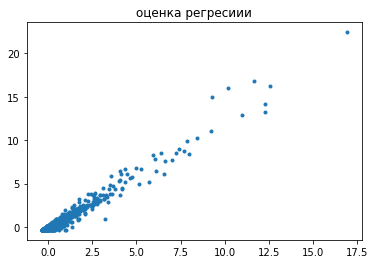

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

scx_ = StandardScaler()
scy_ = StandardScaler()


feature_pred = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT5','PAY_AMT6']
feature_target = 'PAY_AMT4'

xdf_train = train_full.loc[(train_full[feature_target].isna() == False),feature_pred].copy()
xdf_test = train_full.loc[(train_full[feature_target].isna() == True),feature_pred].copy()
ydf_train = train_full.loc[(train_full[feature_target].isna() == False),feature_target].copy()
# нормирование
xdf_trainS = scx_.fit_transform(xdf_train)
xdf_testS = scx_.transform(xdf_test)

ydf_trainS = scy_.fit_transform(ydf_train.values.reshape( -1,1))

# заполнение пробелов по линейной регресиии
#lr_pay4 = LinearRegression()
lr_pay4 = RandomForestRegressor()

lr_pay4=lr_pay4.fit(xdf_trainS, ydf_trainS)
y_testS = lr_pay4.predict(xdf_testS)

y_test = scy_.inverse_transform(y_testS.reshape(-1,1))

with open('imputer_scaler_x.pkl', 'wb') as file:
    pickle.dump(scx_, file)
with open('imputer_scaler_y.pkl', 'wb') as file:
    pickle.dump(scy_, file)
with open('imputer_regress_xy.pkl', 'wb') as file:
    pickle.dump(lr_pay4, file)    

print(y_test[:5])

y_t = lr_pay4.predict(xdf_trainS)
plt.plot(y_t,ydf_trainS,'.')
plt.title('оценка регресиии')
plt.show()



In [168]:
y_test.shape

(100, 1)

In [169]:
train_full.loc[(train_full[feature_target].isna() == True),feature_target]=y_test[:,0]

Повторим для тестов


In [170]:

xdf_test = test_full.loc[(test_full[feature_target].isna() == True),feature_pred].copy()
xdf_testS = scx_.transform(xdf_test)
y_testS = lr_pay4.predict(xdf_testS)

y_test = scy_.inverse_transform(y_testS.reshape(-1,1))
test_full.loc[(test_full[feature_target].isna() == True),feature_target]=y_test[:,0]


In [171]:
# 1.2.7 Замена пропусков - реализация

train_full.loc[train_full['MARRIAGE']==0,'MARRIAGE'] = mariage_median

test_full.loc[test_full['MARRIAGE']==0,'MARRIAGE']= mariage_median

train_full.loc[train_full['EDUCATION']==0,'EDUCATION']= edu_median

test_full.loc[test_full['EDUCATION']==0,'EDUCATION'] = edu_median




In [172]:

print(f'число пропусков в TRAIN: {train_full.isna().sum().sum()}')
print(f'число пропусков в TEST: {test_full.isna().sum().sum()}')

число пропусков в TRAIN: 0
число пропусков в TEST: 0


Найдена категория renewable_energy в purpose, которая отсутствует в TEST dataset. Учитывая ее малый вес, предлагается ее удалить из TRAIN DATASET

In [173]:
# 1.4. Удаление выбросов
# 1.4.1. Общие статистики

display(train_full.describe())
display(test_full.describe())

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,167534.000000,35.403400,52262.014600,50116.101600,48179.337800,44167.629800,40390.07000,38936.693200,5490.896600,5798.034600,5322.451400,4312.206907,4676.073200,5275.610400,0.218600
std,129540.321842,9.227724,76730.660158,74085.638282,71493.368772,67339.168174,62610.06272,60983.041889,13617.785314,18176.899227,19567.356151,12240.745083,13879.510761,18559.093661,0.413338
min,10000.000000,21.000000,-6027.000000,-24704.000000,-17706.000000,-65167.000000,-9584.00000,-209051.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3241.250000,2982.000000,2491.750000,2307.000000,1586.75000,1306.500000,966.250000,672.500000,390.000000,300.000000,285.750000,74.000000,0.000000
50%,140000.000000,34.000000,22599.000000,21525.000000,20485.500000,19282.500000,18121.00000,17007.500000,2199.000000,2000.000000,1829.500000,1500.000000,1516.000000,1500.000000,0.000000
75%,240000.000000,41.000000,68680.000000,64939.500000,60783.250000,54891.500000,49451.75000,48770.000000,5017.250000,5000.000000,4722.250000,4100.000000,4100.000000,4000.000000,0.000000
max,1000000.000000,75.000000,964511.000000,983931.000000,689643.000000,891586.000000,927171.00000,961664.000000,272817.000000,401003.000000,896040.000000,281225.000000,417990.000000,422000.000000,1.000000


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000
mean,168830.000000,1.604400,1.85320,1.557400,35.388600,0.068000,-0.009000,-0.036400,-0.087800,-0.129000,...,46405.479200,43043.7018,40305.589400,39056.875400,5532.762800,6.064399e+03,5447.649800,4870.707315,4748.195400,4834.428400
std,130704.199694,0.489028,0.78624,0.518805,9.163798,0.952658,1.010308,0.983905,0.926857,0.882335,...,67233.099421,62705.5380,59444.317333,58360.045257,15800.513858,2.532547e+04,17426.471298,15667.924836,14280.642486,16068.832888
min,10000.000000,1.000000,1.00000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-157264.000000,-24303.0000,-23003.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.00000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2834.250000,2432.2500,1811.750000,1299.750000,1000.000000,8.195000e+02,390.000000,278.750000,308.750000,200.000000
50%,140000.000000,2.000000,2.00000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20109.500000,19087.5000,18393.000000,17633.000000,2115.500000,2.006000e+03,1800.000000,1500.000000,1553.000000,1500.000000
75%,240000.000000,2.000000,2.00000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,60801.250000,56188.2500,51827.250000,50778.250000,5000.000000,5.000000e+03,4510.500000,4009.500000,4100.000000,4000.000000
max,750000.000000,2.000000,6.00000,3.000000,70.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,559712.000000,514249.0000,547880.000000,498316.000000,493358.000000,1.227082e+06,332809.000000,432130.000000,303512.000000,351282.000000


In [174]:
list_extraX=[]
list_extraX += np.where(train_full.loc[train_full['BILL_AMT1'].values>800000])[1].tolist() 
list_extraX += np.where(train_full.loc[train_full['BILL_AMT2'].values>800000])[1].tolist()
list_extraX += np.where(train_full.loc[train_full['BILL_AMT3'].values>800000])[1].tolist()
list_extraX += np.where(train_full.loc[train_full['BILL_AMT4'].values>800000])[1].tolist()
list_extraX += np.where(train_full.loc[train_full['BILL_AMT5'].values>800000])[1].tolist()

list_extraX = set(list_extraX )

In [175]:
list_extraX 

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22}

In [176]:
# 1.4.3 Удаление выбросов

train_full.drop(index=list_extraX , axis=0, inplace=True)
print(train_full.shape)

(4977, 24)


Объединяем значения

In [177]:
train_full['ID'] = train_full.index
test_full['ID'] = test_full.index

In [178]:

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

In [179]:
def CHi_check(df=train_full,col=None,list_samp =None):
    p=0
    numb_sample = np.sum(df[col].isin(list_samp))
    #print(numb_sample)
    if numb_sample>500:
        numb_sample=500
        if numb_sample>50:
            pay1_and_target_s = df.loc[df[col].isin(list_samp), ['ID', col, 'NEXT_MONTH_DEFAULT']].sample(500)
            table = pay1_and_target_s.pivot_table(values='ID', index=col, columns='NEXT_MONTH_DEFAULT', aggfunc='count')
            #print(table)
            chi2, p, dof, expected = chi2_contingency(table, correction=False)
    return p

In [180]:
alph = 0.05
for col in cat_cols:
    f_uniq = train_full[col].unique()
    #print(col,': ',f_uniq)
    for i in f_uniq:
        for j in f_uniq:
            
            p = CHi_check(df=train_full,col=col,list_samp =[i,j])
            
            if p> alph:
                print(col,': [',i,',',j,']  -',p>alph)
            

SEX : [ 2 , 2 ]  - True
SEX : [ 2 , 1 ]  - True
SEX : [ 1 , 2 ]  - True
SEX : [ 1 , 1 ]  - True
EDUCATION : [ 2 , 2 ]  - True
EDUCATION : [ 2 , 1 ]  - True
EDUCATION : [ 2 , 3 ]  - True
EDUCATION : [ 2 , 5 ]  - True
EDUCATION : [ 2 , 0 ]  - True
EDUCATION : [ 1 , 2 ]  - True
EDUCATION : [ 1 , 1 ]  - True
EDUCATION : [ 1 , 3 ]  - True
EDUCATION : [ 1 , 0 ]  - True
EDUCATION : [ 3 , 2 ]  - True
EDUCATION : [ 3 , 1 ]  - True
EDUCATION : [ 3 , 3 ]  - True
EDUCATION : [ 5 , 1 ]  - True
EDUCATION : [ 5 , 3 ]  - True
EDUCATION : [ 0 , 2 ]  - True
MARRIAGE : [ 1 , 1 ]  - True
MARRIAGE : [ 1 , 3 ]  - True
MARRIAGE : [ 1 , 0 ]  - True
MARRIAGE : [ 2 , 1 ]  - True
MARRIAGE : [ 2 , 2 ]  - True
MARRIAGE : [ 2 , 3 ]  - True
MARRIAGE : [ 3 , 1 ]  - True
MARRIAGE : [ 3 , 2 ]  - True
MARRIAGE : [ 0 , 1 ]  - True
PAY_1 : [ 2 , 3 ]  - True
PAY_1 : [ -1 , -1 ]  - True
PAY_1 : [ -1 , 0 ]  - True
PAY_1 : [ 0 , -1 ]  - True
PAY_1 : [ 0 , 0 ]  - True
PAY_1 : [ 1 , 1 ]  - True
PAY_1 : [ 3 , 2 ]  - True
PAY_2 :

Можно объединять по списку:

PAY_6, PAY_5   : 3 и 2, -1 и 0

PAY_4:  3 и 0 или 3 и 2 (но не вместе)

и т.д.
 

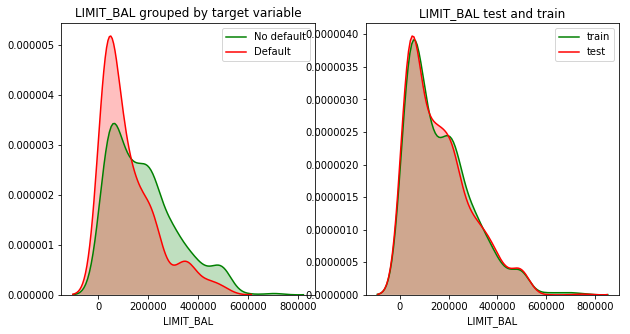

(0.9068841934204102, 3.1788412353329024e-24)


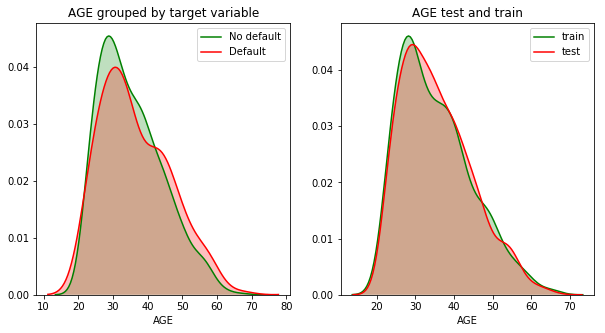

(0.9475595951080322, 2.270851491016314e-18)


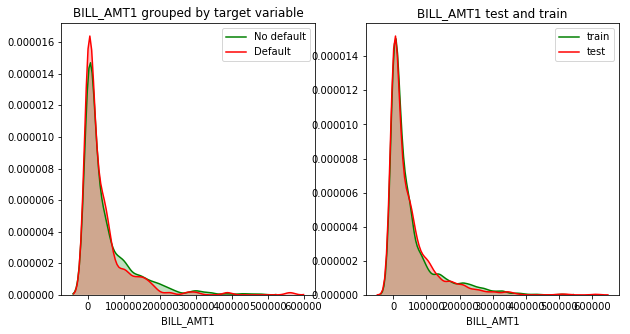

(0.7117955684661865, 2.764725156093099e-38)


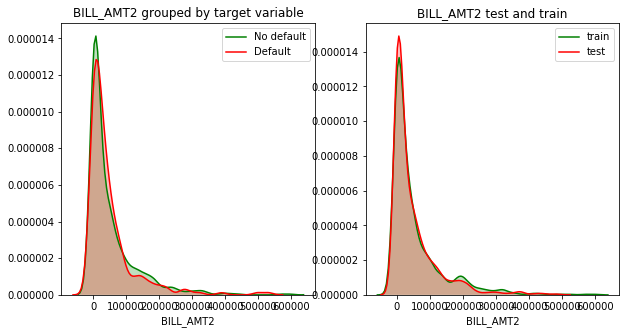

(0.698851466178894, 6.709527749765906e-39)


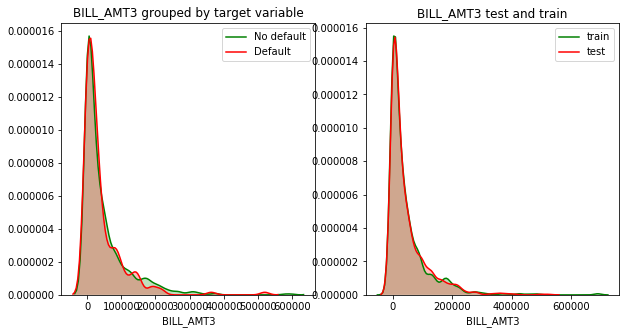

(0.6520730257034302, 5.88307134277488e-41)


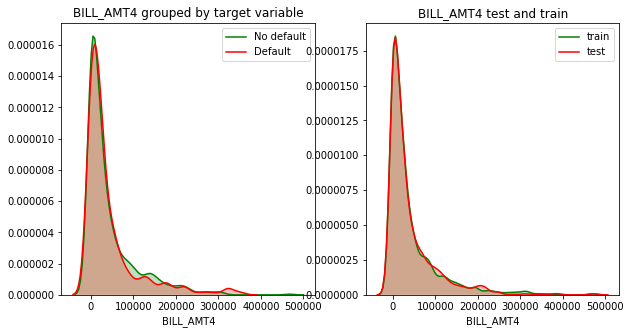

(0.6738598346710205, 4.985525663390191e-40)


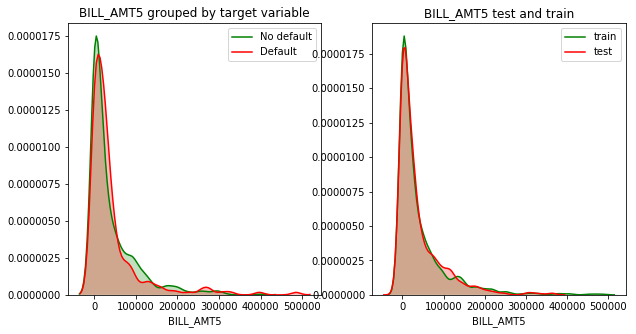

(0.6628050804138184, 1.662164186443525e-40)


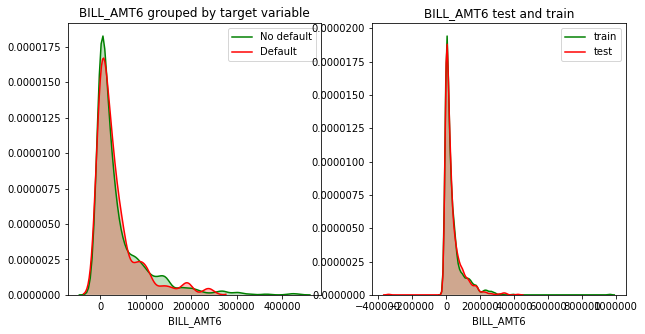

(0.6153231859207153, 2.0248762809493607e-42)


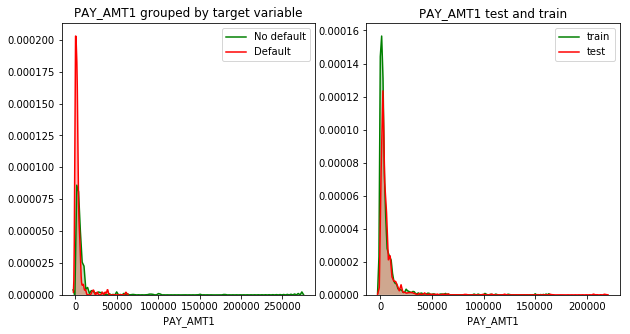

(0.3995986580848694, 0.0)


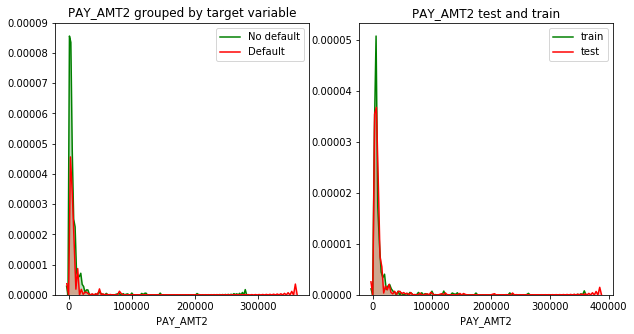

(0.2447737455368042, 0.0)


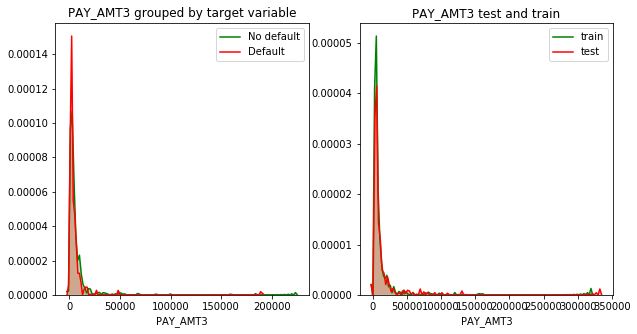

(0.2548249363899231, 0.0)


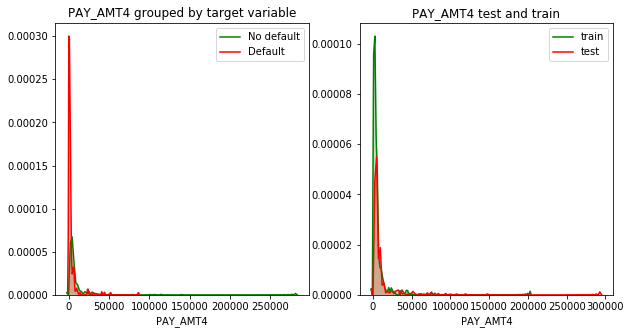

(0.3470228314399719, 0.0)


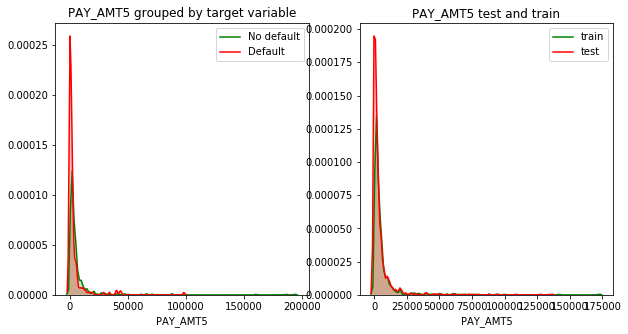

(0.3396568298339844, 0.0)


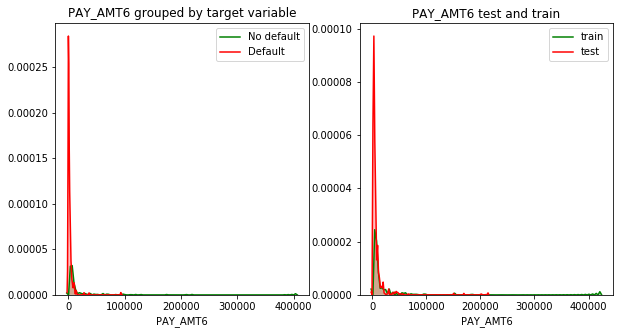

(0.2137102484703064, 0.0)


In [181]:
for col in cont_cols:
    plt.figure(figsize=(10, 5))
    limit_bal_with_target_s = train_full[[col,'NEXT_MONTH_DEFAULT' ]].sample(1000)
    limit_bal_s = limit_bal_with_target_s[col]
    limit_bal_target_0 = limit_bal_s[limit_bal_with_target_s['NEXT_MONTH_DEFAULT'] == 0]
    limit_bal_target_1 = limit_bal_s[limit_bal_with_target_s['NEXT_MONTH_DEFAULT'] == 1]

    
    plt.subplot(1,2,1)
    sns.kdeplot(limit_bal_target_0, shade=True, label='No default', color='g')
    sns.kdeplot(limit_bal_target_1, shade=True, label='Default', color='r')
    
    plt.xlabel(col)
    plt.title(col+' grouped by target variable')
    
    limit_bal_s = train_full[col ].sample(1000)
    limit_bal_st = test_full[col ].sample(1000)

    
    plt.subplot(1,2,2)
    sns.kdeplot(limit_bal_s, shade=True, label='train', color='g')
    sns.kdeplot(limit_bal_st, shade=True, label='test', color='r')
    
    plt.xlabel(col)
    plt.title(col+' test and train')
    
    plt.show()
    print(shapiro(limit_bal_s))

## Преобразование данных

In [182]:
train_full.loc[train_full['PAY_6']=='-1','PAY_6'] = '0'
test_full.loc[test_full['PAY_6']=='-1', 'PAY_6'] = '0'
train_full.loc[train_full['PAY_6']=='3','PAY_6'] = '2'
test_full.loc[test_full['PAY_6']=='3', 'PAY_6'] = '2'

In [183]:



# категоризация
cols_to_cat = cat_cols




for col in cols_to_cat:
    train_full[col] = train_full[col].astype("category")
    test_full[col] = test_full[col].astype("category")




In [184]:
y_train = train_full['NEXT_MONTH_DEFAULT']
X_train = train_full.drop(columns=['NEXT_MONTH_DEFAULT'], axis=1)
X_test = test_full.copy()

#X_train = pd.get_dummies(X_train, drop_first=True)
#X_test = pd.get_dummies(X_test, drop_first=True)

display(y_train.shape, X_train.shape, X_test.shape)

(4977,)

(4977, 24)

(5000, 24)

### Corellation and PCA

**основные этапы**
- Визуальный анализ Целевой переменной
- Корелляционный анализ
- Изучение наличия кластеров
- PCA
- Итоговое разбиение данных для обучения

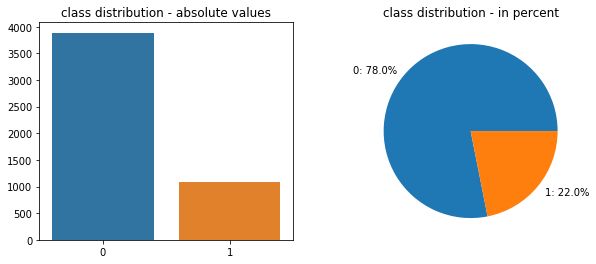

class values


0    3888
1    1089
Name: NEXT_MONTH_DEFAULT, dtype: int64

In [185]:
# 2.1. Визуальный анализ целевой переменной
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].set_title('class distribution - absolute values')
ax[1].set_title('class distribution - in percent')
sns.barplot(list(y_train.value_counts().index), list(y_train.value_counts()), ax=ax[0])
labels_percent = [f'{i}: {round(j/len(y_train),2)*100}%' for i,j 
                  in zip(y_train.value_counts().index, y_train.value_counts())]
ax[1].pie(list(y_train.value_counts()/len(y_train)), labels=labels_percent)
plt.show()

print('class values')
display(y_train.value_counts())

{'BILL_AMT2-BILL_AMT1': 0.9582674324293593,
 'BILL_AMT3-BILL_AMT1': 0.9105327046456066,
 'BILL_AMT4-BILL_AMT1': 0.8690298576689846,
 'BILL_AMT5-BILL_AMT1': 0.8472443712966856,
 'BILL_AMT6-BILL_AMT1': 0.8128491870740858,
 'BILL_AMT1-BILL_AMT2': 0.9582674324293593,
 'BILL_AMT3-BILL_AMT2': 0.9413303959975207,
 'BILL_AMT4-BILL_AMT2': 0.8938312732600057,
 'BILL_AMT5-BILL_AMT2': 0.870169685859027,
 'BILL_AMT6-BILL_AMT2': 0.8434676396228565,
 'BILL_AMT1-BILL_AMT3': 0.9105327046456066,
 'BILL_AMT2-BILL_AMT3': 0.9413303959975207,
 'BILL_AMT4-BILL_AMT3': 0.9229236439674176,
 'BILL_AMT5-BILL_AMT3': 0.8957965331605248,
 'BILL_AMT6-BILL_AMT3': 0.8630915390330657,
 'BILL_AMT1-BILL_AMT4': 0.8690298576689846,
 'BILL_AMT2-BILL_AMT4': 0.8938312732600057,
 'BILL_AMT3-BILL_AMT4': 0.9229236439674176,
 'BILL_AMT5-BILL_AMT4': 0.9424477801133281,
 'BILL_AMT6-BILL_AMT4': 0.9050663651409216,
 'BILL_AMT1-BILL_AMT5': 0.8472443712966856,
 'BILL_AMT2-BILL_AMT5': 0.870169685859027,
 'BILL_AMT3-BILL_AMT5': 0.89579653

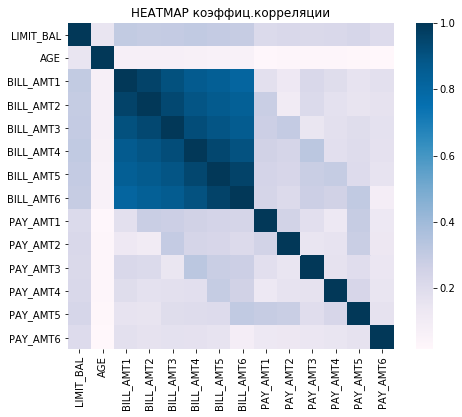

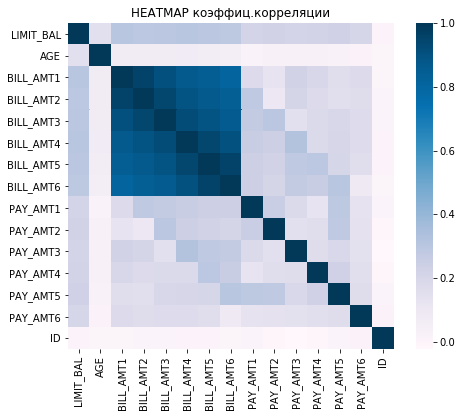

In [186]:
# 2.4. Корелляционный анализ
# 2.4.1. Пользовательская функция
cols_to_analyze = cont_cols

def plot_corr_map(corr_matrix):
    "plot given correlation matrix in heatmap style"
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes()
    ax.set_title('HEATMAP коэффиц.корреляции')
    sns.heatmap(corr_matrix, square=True,ax=ax,cmap='PuBu');

# 2.4.2. Корелляция непрерывных данных
corr_matrix = X_train[cols_to_analyze].corr()
plot_corr_map(corr_matrix)

# 3.5.3. Корелляция всех признаков
corr_matrix = X_train.corr()
plot_corr_map(corr_matrix)

correlated_features = dict()
corr_threshold = 0.7

for col in corr_matrix.columns:
    for row in corr_matrix[col].index:
        if corr_threshold < abs(corr_matrix.loc[row, col]) < 1.0:
            pair = f'{row}-{col}'
            correlated_features[pair] = corr_matrix.loc[row, col]

display(correlated_features)

Как видно, имеется группа высоко-кореллированных признаков. Предлагается:
- создать общую переменную 


In [187]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,ID
23,30000.0,2,2,1,32,2,2,0,0,0,...,20946.0,15525.0,7422.0,0.0,1542.0,1024.0,1000.0,7422.0,281.0,23
24,230000.0,1,1,1,41,-1,-1,-1,-1,-1,...,1172.0,1172.0,2246.0,792.0,19272.0,1172.0,1172.0,2246.0,1172.0,24
25,80000.0,1,1,2,38,-1,0,0,0,0,...,18361.0,10434.0,7387.0,16445.0,1482.0,1011.0,8.0,111.0,3509.0,25
26,100000.0,2,1,2,28,0,0,0,0,0,...,12233.0,6741.0,-24.0,1400.0,1506.0,1209.0,0.0,0.0,0.0,26
27,230000.0,2,2,2,26,-1,-1,0,0,0,...,35695.0,5555.0,15165.0,90523.0,10000.0,5170.0,5000.0,15165.0,8981.0,27


In [188]:
# 2.5. Подбор параметров PCA

# 2.5.1. Преобразование данных - временное, ТОЛЬКО для подбора гиперпараметров PCA и только для среза X_train
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()


X_train_scaled = scaler.fit_transform(X_train.iloc[:,-13:-7])
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=X_train.iloc[:,-13:-7].columns)
X_train_scaled.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,4.977000e+03,4.977000e+03,4.977000e+03,4.977000e+03,4.977000e+03,4.977000e+03
mean,-1.853439e-17,6.512271e-17,-2.423106e-17,-8.516156e-17,-6.887588e-17,5.193644e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-7.604429e-01,-1.011532e+00,-9.235346e-01,-1.628560e+00,-8.011116e-01,-4.086489e+00
25%,-6.394700e-01,-6.371269e-01,-6.403292e-01,-6.231646e-01,-6.216896e-01,-6.188794e-01
50%,-3.877456e-01,-3.876634e-01,-3.885381e-01,-3.706759e-01,-3.563139e-01,-3.614449e-01
75%,2.148603e-01,2.012263e-01,1.799062e-01,1.595892e-01,1.472527e-01,1.633970e-01
max,1.191048e+01,1.263146e+01,8.996494e+00,1.262837e+01,1.424045e+01,1.521187e+01


In [189]:
# 2.5.2. PCA - поиск параметра
from sklearn.decomposition import PCA
break_even = [ 0.95, 0.975, 0.99]

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
var_vector = np.cumsum(pca.explained_variance_ratio_)

for level in break_even:
    temp_list = []
    for n in var_vector:
        if n<=level: temp_list.append(n)
    print(f'required number of components for {level*100}% of total VAR is {len(temp_list)}')  

required number of components for 95.0% of total VAR is 1
required number of components for 97.5% of total VAR is 2
required number of components for 99.0% of total VAR is 4


Таким образом можно сохранить 99% вариации, сократив пространство непрерывных признаков  до 4 (но не буду делать, т.к. нужно хранить еще один скайлер)

удаляем переменные BILL_AMT и добавим РСА

In [191]:
X_train_pca[:5,:4]

array([[-8.80428165e-01,  1.62467149e-01, -1.07003786e-01,
         6.98439553e-03],
       [-1.47078216e+00,  1.41650055e-03, -1.31414324e-01,
        -1.64065626e-01],
       [-9.63897497e-01,  1.76553632e-01, -8.03684855e-02,
        -2.00989666e-02],
       [-1.14278095e+00,  2.41651118e-01, -3.83478382e-02,
         6.30156113e-02],
       [-1.66013502e-01,  5.84310993e-01, -5.31629558e-01,
        -6.05472848e-01]])

In [192]:
def PCA_inv(X=None,X_test=None,n_comp = 4,feature_list=[] ):
    pca = PCA(n_components=n_comp)
    scaler = StandardScaler()
    ind_list=range(-13,-7)
    X_scaled = scaler.fit_transform(X.iloc[:,ind_list])
    X_scaled_test = scaler.fit_transform(X_test.iloc[:,ind_list])
    X_pca = pca.fit_transform(X_scaled)
    X_pca_test = pca.transform(X_scaled_test)
    X.drop(feature_list,axis=1,inplace=True)
    X_test.drop(feature_list,axis=1,inplace=True)
    for i in range(n_comp):
        X['psa'+str(i)] = X_pca[:,i]
        X_test['psa'+str(i)] = X_pca_test[:,i]
    return X,X_test

In [193]:
X_train, X_test = PCA_inv(X=X_train,X_test=X_test,n_comp = 4,feature_list=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'])
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,ID,psa0,psa1,psa2,psa3
23,30000.0,2,2,1,32,2,2,0,0,0,...,1542.0,1024.0,1000.0,7422.0,281.0,23,-0.880428,0.162467,-0.107004,0.006984
24,230000.0,1,1,1,41,-1,-1,-1,-1,-1,...,19272.0,1172.0,1172.0,2246.0,1172.0,24,-1.470782,0.001417,-0.131414,-0.164066
25,80000.0,1,1,2,38,-1,0,0,0,0,...,1482.0,1011.0,8.0,111.0,3509.0,25,-0.963897,0.176554,-0.080368,-0.020099
26,100000.0,2,1,2,28,0,0,0,0,0,...,1506.0,1209.0,0.0,0.0,0.0,26,-1.142781,0.241651,-0.038348,0.063016
27,230000.0,2,2,2,26,-1,-1,0,0,0,...,10000.0,5170.0,5000.0,15165.0,8981.0,27,-0.166014,0.584311,-0.531630,-0.605473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,240000.0,2,1,2,38,-1,-1,-1,-1,-1,...,3816.0,3816.0,816.0,3816.0,816.0,4995,-1.507229,-0.028748,-0.012925,-0.005729
4996,260000.0,2,2,2,34,-1,-1,-1,-1,0,...,11247.0,27500.0,0.0,21380.0,0.0,4996,-0.924617,-0.496465,0.017730,0.063683
4997,140000.0,1,2,1,38,0,0,0,0,0,...,5303.0,2806.0,1825.0,1880.0,1901.0,4997,2.004906,0.834049,-0.071039,-0.413325
4998,220000.0,2,2,1,36,2,2,2,0,0,...,0.0,7000.0,7000.0,7200.0,23700.0,4998,5.218288,-0.492623,0.158043,-0.031896


### Hyperparameter Tuning

In [194]:
# 3.1. Necessary imports

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb, lightgbm as lgbm, catboost as catb
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
import itertools
from imblearn.pipeline import Pipeline as SM_Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import AdaBoostClassifier

In [195]:
cont_cols = ['LIMIT_BAL','AGE','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','psa1','psa2','psa3','psa0']


In [216]:
X_valid

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,psa0,psa1,psa2,psa3
1322,0.250776,1,1,2,-0.369767,0,0,0,0,0,...,-0.275036,-0.222058,-0.135707,-0.214003,-0.120633,-0.149011,0.024590,-0.474397,0.030610,-0.014913
1828,1.177534,2,1,1,-0.044754,-1,2,-1,-1,-1,...,-0.402512,12.465284,-0.091481,0.835615,-0.250121,0.159177,-0.042504,1.063898,-5.300242,-7.888943
4307,0.328006,2,2,1,-0.153092,0,0,0,0,0,...,0.295520,0.187273,0.162096,0.078034,0.037630,-0.013841,2.152183,0.525966,-1.579324,0.370934
1839,-1.139361,1,2,2,-1.236467,2,2,2,2,3,...,-0.284593,-0.318527,-0.008894,-0.359097,-0.336446,-0.284181,-0.415821,-0.281325,-0.040563,0.101216
3101,-1.062132,2,1,2,-0.911455,0,0,0,0,0,...,-0.292606,-0.236122,-0.220488,-0.275033,-0.250121,-0.053257,-0.297611,-0.303349,0.008761,-0.061183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,-0.907672,2,2,2,-1.344805,0,0,-1,-1,-1,...,0.007485,-0.272600,-0.228854,-0.288820,-0.099052,-0.204377,-0.583749,0.377911,0.659320,0.553843
2622,2.567672,2,1,1,-0.153092,-1,-1,-1,-1,-1,...,0.552825,0.395647,0.391646,0.733730,0.598744,0.418703,-0.494439,-0.143261,-0.007870,-0.008344
1763,-0.289833,1,1,1,0.496934,2,2,0,0,0,...,-0.402879,-0.043845,-0.016443,-0.022843,0.382931,-0.082832,0.632693,-0.940868,0.365842,-0.189063
2609,-0.675982,2,2,1,-0.044754,1,2,2,2,0,...,-0.402879,0.055041,-0.271499,-0.275033,-0.192571,-0.203079,0.238022,0.913583,-1.369226,0.413830


In [196]:
from sklearn.preprocessing import MinMaxScaler
scx_f =  StandardScaler()#MinMaxScaler()
scy_f =  StandardScaler()#MinMaxScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[cont_cols] = scx_f.fit_transform(X_train[cont_cols])
X_test_scaled[cont_cols] = scx_f.transform(X_test[cont_cols])


In [202]:
X_train_scaled.drop('ID',axis=1,inplace=True)
X_test_scaled.drop('ID',axis=1,inplace=True)

In [207]:
# 3.3. Подготовка данных и базовых настроек

X_train_reduced, X_valid, y_train_reduced, y_valid = train_test_split(X_train_scaled.iloc[:,:], y_train, test_size=100, random_state=37)

smote = SMOTE(sampling_strategy='auto', n_jobs=-1)
cv_ = KFold(n_splits=10, shuffle=True, random_state=42)

result_dict = dict()



In [208]:
# 3.4. Пользовательские функции
def parse_params(param_grid, model_label):
    param_dict = dict()
    for key, value in param_grid.items():
        param_dict[model_label+"__"+key] = value
    return param_dict


def show_proba_calibration_plots(y_predicted_probs, y_true_labels, p_min, p_max, p_step):
    y_predicted_probs = y_predicted_probs[:,1]
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(p_min, p_max, p_step):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()
    
    
def update_predict_by_prob(y_true, predict_probas, prob_min, prob_max, prob_steps, score='f1', show_chart=False):
    if score=='f1':
        score_estimator = f1_score
    elif score=='accuracy':
        score_estimator = accuracy_score
    else:
        print('wrong score name')
        return None
    prob_range = np.linspace(prob_min, prob_max, prob_steps)
    scores = []
    for p in prob_range:
        predict_rebalanced = np.array([1 if x>=p else 0 for x in predict_probas[:,1]])
        scores.append(score_estimator(y_true, predict_rebalanced))
    if show_chart:
        figure = plt.figure(figsize = (5, 4))
        plt.ylabel('Scores')
        plt.xlabel('Probability threshold')
        plt.plot(prob_range, scores, label=score, linewidth=4)
        plt.title("Best Threshold Probability Search")
        plt.show()
    scores = np.array(scores)
    best_prob = prob_range[scores.argmax()]
    print(f'best threshold probability = {best_prob}')
    predict_rebalanced_final = np.array([1 if x>=best_prob else 0 for x in predict_probas[:,1]])
    return predict_rebalanced_final, best_prob

In [212]:
lgBM_=lgbm.LGBMClassifier(n_jobs=-1, random_state=42).fit(X_train_reduced, y_train_reduced)
lgR_=LogisticRegression().fit(X_train_reduced, y_train_reduced)
lRF_=RandomForestClassifier().fit(X_train_reduced, y_train_reduced)

print(classification_report(lgBM_.predict(X_valid),y_valid))
print(classification_report(lgR_.predict(X_valid),y_valid))
print(classification_report(lRF_.predict(X_valid),y_valid))




              precision    recall  f1-score   support

           0       0.93      0.90      0.91        88
           1       0.40      0.50      0.44        12

    accuracy                           0.85       100
   macro avg       0.66      0.70      0.68       100
weighted avg       0.87      0.85      0.86       100

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        90
           1       0.33      0.50      0.40        10

    accuracy                           0.85       100
   macro avg       0.64      0.69      0.66       100
weighted avg       0.88      0.85      0.86       100

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        90
           1       0.33      0.50      0.40        10

    accuracy                           0.85       100
   macro avg       0.64      0.69      0.66       100
weighted avg       0.88      0.85      0.86       100



LGBMClassifier +++

LIGHT-BOOST
----------------------------------------------------------------------
best f1 score on CV = 0.4330344651207178
{'boosting_type': 'goss', 'class_weight': 'balanced', 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 50, 'n_jobs': -1, 'num_leaves': 300, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.5, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'categorical_feature': ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']}


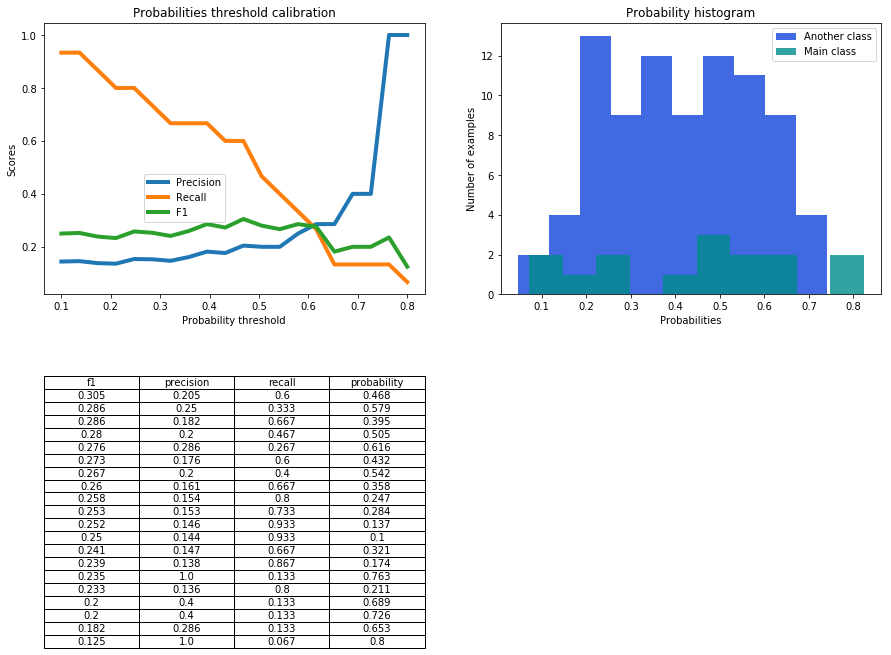

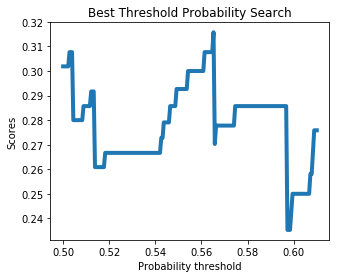

best threshold probability = 0.5652261306532663
0.3018867924528302
0.31578947368421056
----------------------------------------------------------------------
f1 on valid set = 0.3018867924528302
f1 on valid set after calibrating = 0.31578947368421056
[[68 17]
 [ 9  6]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        85
           1       0.26      0.40      0.32        15

    accuracy                           0.74       100
   macro avg       0.57      0.60      0.58       100
weighted avg       0.79      0.74      0.76       100



In [224]:
# 3.11. Настройка Light-boost
pipeline_steps = [
                    ('oversampler', smote),
                    ('light', lgbm.LGBMClassifier(n_jobs=-1, categorical_feature = cat_cols,  class_weight='balanced'))
                     ]


param_grid = {
    'boosting_type': ['goss'],
    'n_estimators': [10,50, 100 ],
    'learning_rate': [1e-1], #0.1
    'max_depth': [2,5,10],
    'reg_lambda': [0.5], 
    'num_leaves': [300] 
    }


# 3.11.2. GridSearch
print(f'LIGHT-BOOST')
print(70*'-')
param_grid = parse_params(param_grid, pipeline_steps[-1][0])
pipe = SM_Pipeline(pipeline_steps)
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv=cv_)
grid.fit(X_train_reduced, y_train_reduced)
best_model = grid.best_estimator_[-1]
print(f'best f1 score on CV = {grid.best_score_}')
best_params = best_model.get_params()
print(best_params)

# 3.11.3. Test  
model_label = pipeline_steps[-1][0]
pipeline_steps2 = pipeline_steps.copy()
pipeline_steps2[-1] = (model_label, best_model)
pipe2 = SM_Pipeline(pipeline_steps2)
pipe2.fit(X_train_reduced, y_train_reduced)
predict = pipe2.predict(X_valid)
predict_train = pipe2.predict(X_train_reduced)

# 3.11.4.калитбровка
predict_probas = pipe2.predict_proba(X_valid)
show_proba_calibration_plots(predict_probas, y_valid, 0.1, 0.8, 20)
predict2, threshold_prob = update_predict_by_prob(y_valid, predict_probas, 0.5, 0.61, 200, score='f1', show_chart=True)
print(f1_score(y_valid, predict))
print(f1_score(y_valid, predict2))


# 3.11.5. результаты
print(70*'-')
print(f'f1 on valid set = {f1_score(y_valid, predict)}')
print(f'f1 on valid set after calibrating = {f1_score(y_valid, predict2)}')
print(confusion_matrix(y_valid, predict2))
print(classification_report(y_valid, predict2))
label = pipeline_steps[-1][0]+'_tuned'
result_dict[label] = (accuracy_score(y_valid, predict2), f1_score(y_valid, predict2), best_params, threshold_prob)

### Обучение финальной модели

**описание действий**
- Загрузка выбранного экземпляра модели
- Подготовка данных (Тестовая Выборка)
- Обучение модели
- Генерация прогноза

In [226]:
# 4.2. Обучение модели на полном датасете (X_train)

threshold_prob = 0.565

pipeline_steps = [
                    ('oversampler', smote),
                    ('light', lgbm.LGBMClassifier(n_jobs=-1, random_state=42, categorical_feature = cat_cols,  class_weight='balanced'))
                     ]


final_params = {
    'boosting_type': ['goss'],
    'n_estimators': [160],
    'learning_rate': [1e-1], #0.1
    'max_depth': [3],
    'reg_lambda': [0.1], 
    'num_leaves': [300] 
    }


model = SM_Pipeline(pipeline_steps)
model.fit(X_train_scaled.iloc[:,:], y_train)

predict_train_probas = model.predict_proba(X_train_scaled.iloc[:,:])
predict_train = np.array([1 if x>=threshold_prob else 0 for x in predict_train_probas[:,1]])

print(' Final Model')
print(70*'-')
print(f'accuracy on full train set = {accuracy_score(y_train, predict_train)}')
print(f'f1 on full train set = {f1_score(y_train, predict_train)}')
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))
print(70*'-')

 Final Model
----------------------------------------------------------------------
accuracy on full train set = 0.8862768736186458
f1 on full train set = 0.6823793490460158
[[3803   85]
 [ 481  608]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3888
           1       0.88      0.56      0.68      1089

    accuracy                           0.89      4977
   macro avg       0.88      0.77      0.81      4977
weighted avg       0.89      0.89      0.88      4977

----------------------------------------------------------------------


In [227]:
# 4.3. Генерация  и  экспорт прогноза
y_pred_probas = model.predict_proba(X_test_scaled.iloc[:,:])
y_pred = np.array([1 if x>=threshold_prob else 0 for x in y_pred_probas[:,1]])
y_pred = pd.DataFrame(y_pred, columns=['NEXT_MONTH_DEFAULT'])

print(y_pred.shape)

(5000, 1)


In [228]:
# 4.4. Экспорт результатов
import csv
filename = 'Korlyakova.csv'
y_pred.to_csv(filename, index=None)

In [229]:
print(classification_report(test_full_ans, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      3898
           1       0.45      0.22      0.29      1102

    accuracy                           0.77      5000
   macro avg       0.63      0.57      0.58      5000
weighted avg       0.73      0.77      0.74      5000



In [230]:
X_test_scaled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,psa0,psa1,psa2,psa3
5000,-1.139361,2,2.0,1.0,-0.911455,0,0,0,-1,0,...,-0.292606,-0.252603,-0.169477,-0.359097,-0.336446,-0.284181,-0.577096,0.414441,-0.080165,-0.455627
5001,1.718143,2,2.0,2.0,-0.586442,0,0,0,-1,-1,...,-0.324218,-0.251175,-0.031236,6.681732,-0.113439,-0.116570,-0.096415,-1.823131,2.916235,-0.358209
5002,-0.753212,2,1.0,1.0,-0.694780,0,0,0,0,0,...,-0.160278,-0.148224,-0.128668,-0.140532,-0.124949,-0.121977,0.402990,-0.435943,0.018686,-0.076342
5003,-0.984902,2,2.0,2.0,-1.019792,0,0,2,0,0,...,-0.111243,-0.318527,-0.176720,-0.233002,0.023243,-0.197402,-0.084453,-0.271534,-0.012179,-0.037082
5004,0.250776,1,2.0,1.0,0.821946,2,3,2,2,2,...,-0.402879,-0.043845,-0.271499,0.649666,-0.070277,-0.284181,0.850325,-0.846989,0.388374,-0.265051


In [231]:
X_test_scaled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,psa0,psa1,psa2,psa3
5000,-1.139361,2,2.0,1.0,-0.911455,0,0,0,-1,0,...,-0.292606,-0.252603,-0.169477,-0.359097,-0.336446,-0.284181,-0.577096,0.414441,-0.080165,-0.455627
5001,1.718143,2,2.0,2.0,-0.586442,0,0,0,-1,-1,...,-0.324218,-0.251175,-0.031236,6.681732,-0.113439,-0.116570,-0.096415,-1.823131,2.916235,-0.358209
5002,-0.753212,2,1.0,1.0,-0.694780,0,0,0,0,0,...,-0.160278,-0.148224,-0.128668,-0.140532,-0.124949,-0.121977,0.402990,-0.435943,0.018686,-0.076342
5003,-0.984902,2,2.0,2.0,-1.019792,0,0,2,0,0,...,-0.111243,-0.318527,-0.176720,-0.233002,0.023243,-0.197402,-0.084453,-0.271534,-0.012179,-0.037082
5004,0.250776,1,2.0,1.0,0.821946,2,3,2,2,2,...,-0.402879,-0.043845,-0.271499,0.649666,-0.070277,-0.284181,0.850325,-0.846989,0.388374,-0.265051
